In [1]:
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns
%matplotlib inline

In [ ]:
qtls_NDVI = np.array([0.1,0.16,0.18,0.21,0.23,0.27,0.35,0.47,0.65])
qtls_TRMM = np.array([1.99,3.18,5.02,7.96,13.34,22.47,36.94,58.43,94.4])
qtls_LST = np.array([13.19,13.59,13.94,14.33,14.66,14.88,15.04,15.21,15.42])

qtls_NDVI_lst = qtls_NDVI.tolist()
qtls_NDVI_lst.insert(0,' ')
qtls_NDVI_lst.append(' ')

qtls_TRMM_lst = qtls_TRMM.tolist()
qtls_TRMM_lst.insert(0,' ')
qtls_TRMM_lst.append(' ')  

qtls_LST_lst = qtls_LST.tolist()
qtls_LST_lst.insert(0,' ')
qtls_LST_lst.append(' ')

In [2]:
df_allyears_raw = pd.read_csv(r'D:\Downloads\Mattijn@Jia\png\trial_5\data_dataframes_csv//df_allyears_raw.csv', 
                                index_col=0, parse_dates=True)
df_allyears_class = pd.read_csv(r'D:\Downloads\Mattijn@Jia\png\trial_5\data_dataframes_csv//df_allyears_class.csv', 
                                index_col=0, parse_dates=True)

01 [  3.79647603e-01   2.55337846e-02   3.16374186e-04]
[  8.85403235e-03  -9.99960750e-01  -3.22975681e-04]
02 [  1.14919584e+00   2.50418949e-02   1.96665727e-04]
[ 0.00192242  0.99998637  0.00485421]
03 [  6.83023077e+00   2.07919476e-02   2.65077794e-05]
[  5.85053634e-04  -9.99893807e-01   1.45613058e-02]
04 [  1.27362941e+01   7.47945050e-03   8.16765088e-05]
[ -2.89311109e-04   9.99921301e-01  -1.25422136e-02]
05 [  1.74899065e+02   2.80415353e-03   4.08444368e-04]
[  7.57015791e-04   9.99998662e-01  -1.44987858e-03]
06 [  4.26280718e+02   3.56277388e-03   7.93378130e-04]
[  8.89999598e-04   9.99993170e-01  -3.58714785e-03]
07 [  4.63224028e+02   6.88061878e-03   2.64803439e-04]
[ 0.00119043  0.99999751 -0.0018879 ]
08 [  1.42237379e+02   7.35984987e-03   1.75142874e-04]
[ -2.57685865e-04  -9.99998518e-01   1.70206878e-03]
09 [  1.39892379e+02   3.13319889e-03   2.05084999e-04]
[ 0.00124252  0.99999391 -0.00326034]
10 [  2.47414761e+01   1.73459759e-03   6.52438037e-05]
[ -8.744

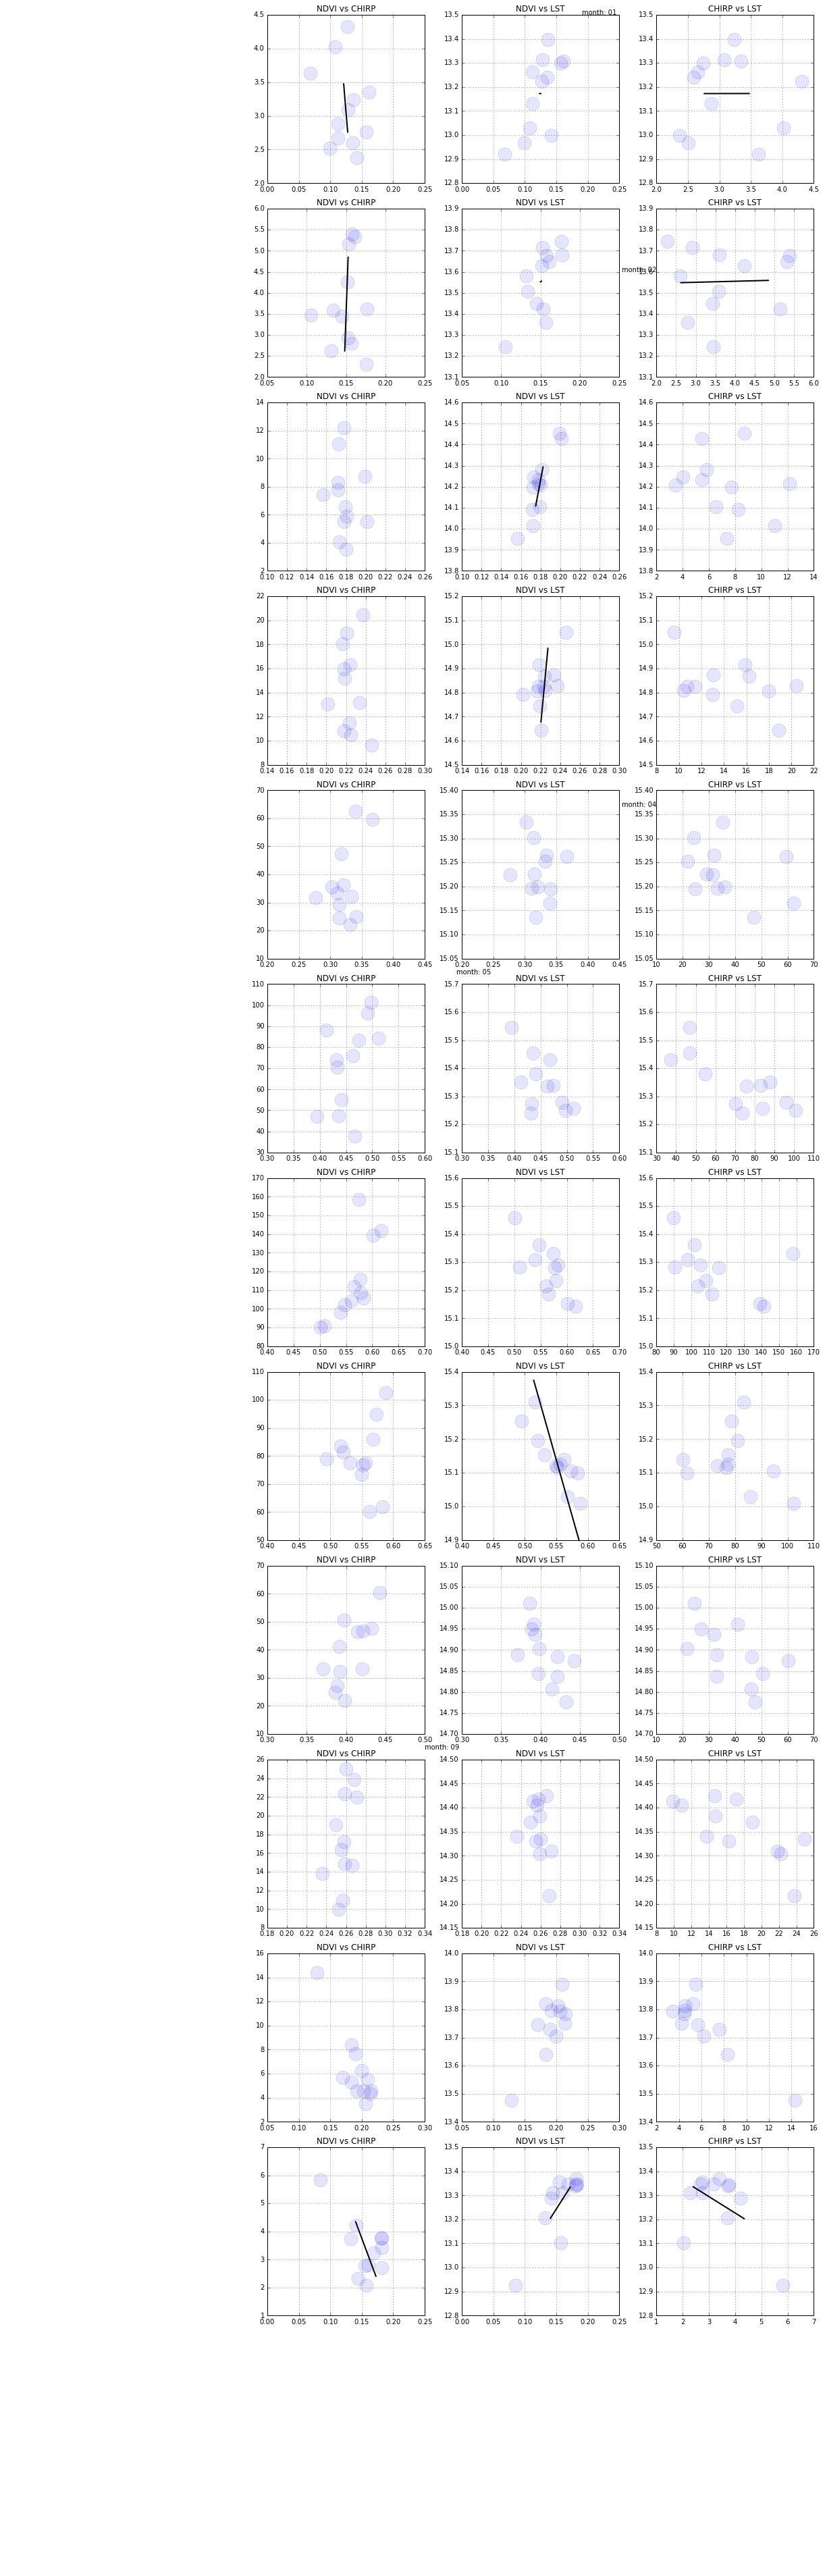

In [3]:
fig = plt.figure(figsize=(12,48))
df_allyears_raw_grouped = df_allyears_raw.groupby(lambda x: x.month)
for month, data_month in df_allyears_raw_grouped:
    print str(month).zfill(2),

    mean = np.mean(data_month.T,axis=1)
    demeaned = data_month-mean
    evals, evecs = np.linalg.eig(np.cov(demeaned.T))
    
    #evals,evecs are not guaranteed to be ordered
    order = evals.argsort()[::-1] 
    print evals[order]
    print evecs[:,order[0]]
    
    m = data_month.mean(axis=0)    

    e1 = evecs[:,order[0]]
    e1v = evals[order[0]]    
    
    l1 = np.array([([0, e1[0]*e1v]+m[0])[1],
                   ([0, e1[1]*e1v]+m[1])[1],
                   ([0, e1[2]*e1v]+m[2])[1]])
    
    l2 = np.array([([0, e1[0]*e1v]-m[0])[1]*-1,
                   ([0, e1[1]*e1v]-m[1])[1]*-1,
                   ([0, e1[2]*e1v]-m[2])[1]*-1])
    
#     #data_month = data_month.as_matrix()
    mean_NDVI  = np.mean(data_month.NDVI)
    mean_CHIRP = np.mean(data_month.CHIRP)
    mean_LST   = np.mean(data_month.LST)
    center     = [mean_NDVI,mean_CHIRP,mean_LST]    
    
    plot1 = month*3-2
    plot2 = month*3-1    
    plot3 = month*3-0        

#     # --- # --- # --- # --- # --- # ax1 # --- # --- # --- # --- # --- #
    ax1 = plt.subplot(12,3,plot1)
    ax1.scatter(data_month.NDVI,data_month.CHIRP, alpha=0.1, s=400,zorder=3)
    ax1.annotate ('', (l1[0], l1[1]), (l2[0], l2[1]), arrowprops={'arrowstyle':'-','linewidth':2,'color':'k'},)
    
#     ax1.xaxis.set_ticklabels(qtls_NDVI_lst)
#     ax1.xaxis.set_label_text('NDVI 5-quantiles')
#     ax1.set_xlim(0,5)
#     ax1.yaxis.set_ticklabels(qtls_TRMM_lst)
#     ax1.yaxis.set_label_text('CHIRP 5-quantiles (mm)')
#     ax1.set_ylim(0,5)
    ax1.grid(True)
    ax1.set_title('NDVI vs CHIRP')
    ax1.text(0.5,4.5, 'month: '+str(month).zfill(2))
    
    # --- # --- # --- # --- # --- # ax2 # --- # --- # --- # --- # --- #
    ax2 = plt.subplot(12,3,plot2)
    ax2.scatter(data_month.NDVI,data_month.LST, alpha=0.1, s=400)
    ax2.annotate ('', (l1[0], l1[2]), (l2[0], l2[2]), arrowprops={'arrowstyle':'-','linewidth':2,'color':'k'},)
    
#     ax2.xaxis.set_ticklabels(qtls_NDVI_lst)
#     ax2.xaxis.set_label_text('NDVI 5-quantiles')
#     ax2.set_xlim(0,5)
#     ax2.yaxis.set_ticklabels(qtls_LST_lst)
#     ax2.yaxis.set_label_text('LST 5-quantiles (degrees)')
#     ax2.set_ylim(0,5)
    ax2.grid(True)
    ax2.set_title('NDVI vs LST')
#     # --- # --- # --- # --- # --- # ax3 # --- # --- # --- # --- # --- #
    
    ax3 = plt.subplot(12,3,plot3)
    ax3.scatter(data_month.CHIRP,data_month.LST, alpha=0.1, s=400,zorder=3)
    ax3.annotate ('', (l1[1], l1[2]), (l2[1], l2[2]), arrowprops={'arrowstyle':'-','linewidth':2,'color':'k'},)    
    
#     ax3.yaxis.set_ticklabels(qtls_LST_lst)
#     ax3.yaxis.set_label_text('LST 5-quantiles (degrees)')
#     ax3.set_ylim(0,5)
#     ax3.xaxis.set_ticklabels(qtls_TRMM_lst)
#     ax3.xaxis.set_label_text('CHIRP 5-quantiles')
#     ax3.set_xlim(0,5)
    ax3.grid(True)
    ax3.set_title('CHIRP vs LST')
    
plt.tight_layout()  
plt.savefig(r'D:\Downloads\Mattijn@Jia\png\trial_6//pca_allmonths_raw_1.png', dpi=300)
plt.show()